# CW3
## Hanlin Liu    02081102

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
# plotting preferences updates
colors = ['#132A36', '#780627','#4692BD', '#079069']

# Set plotting parameters
params = {'figure.figsize': (6.0,6.0),
          'axes.labelsize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'legend.fontsize': 12,
          'font.size': 12
           }

plt.rcParams.update(params)

-----------------
### 1(a)

In [2]:
# function of Lorenz system with parameters
# sigma=10, rho=28, beta=8/3
def Lorenz(t, X, s=10, r=28, b=8/3):
    x,y,z = X
    dx = s*(y-x)
    dy = x*(r-z)-y
    dz = x*y-b*z
    return [dx,dy,dz]

In [3]:
# time step
h = 0.01
# time span for the simulation
t_span = (0,2000)
t_eval = np.arange(t_span[0], t_span[1], h)
# initial condition
ic = [1.0, 1.0, 1.0]

# solution of the simulation
sol = solve_ivp(Lorenz, t_span, ic, t_eval=t_eval)
x,y,z = sol.y
t = sol.t

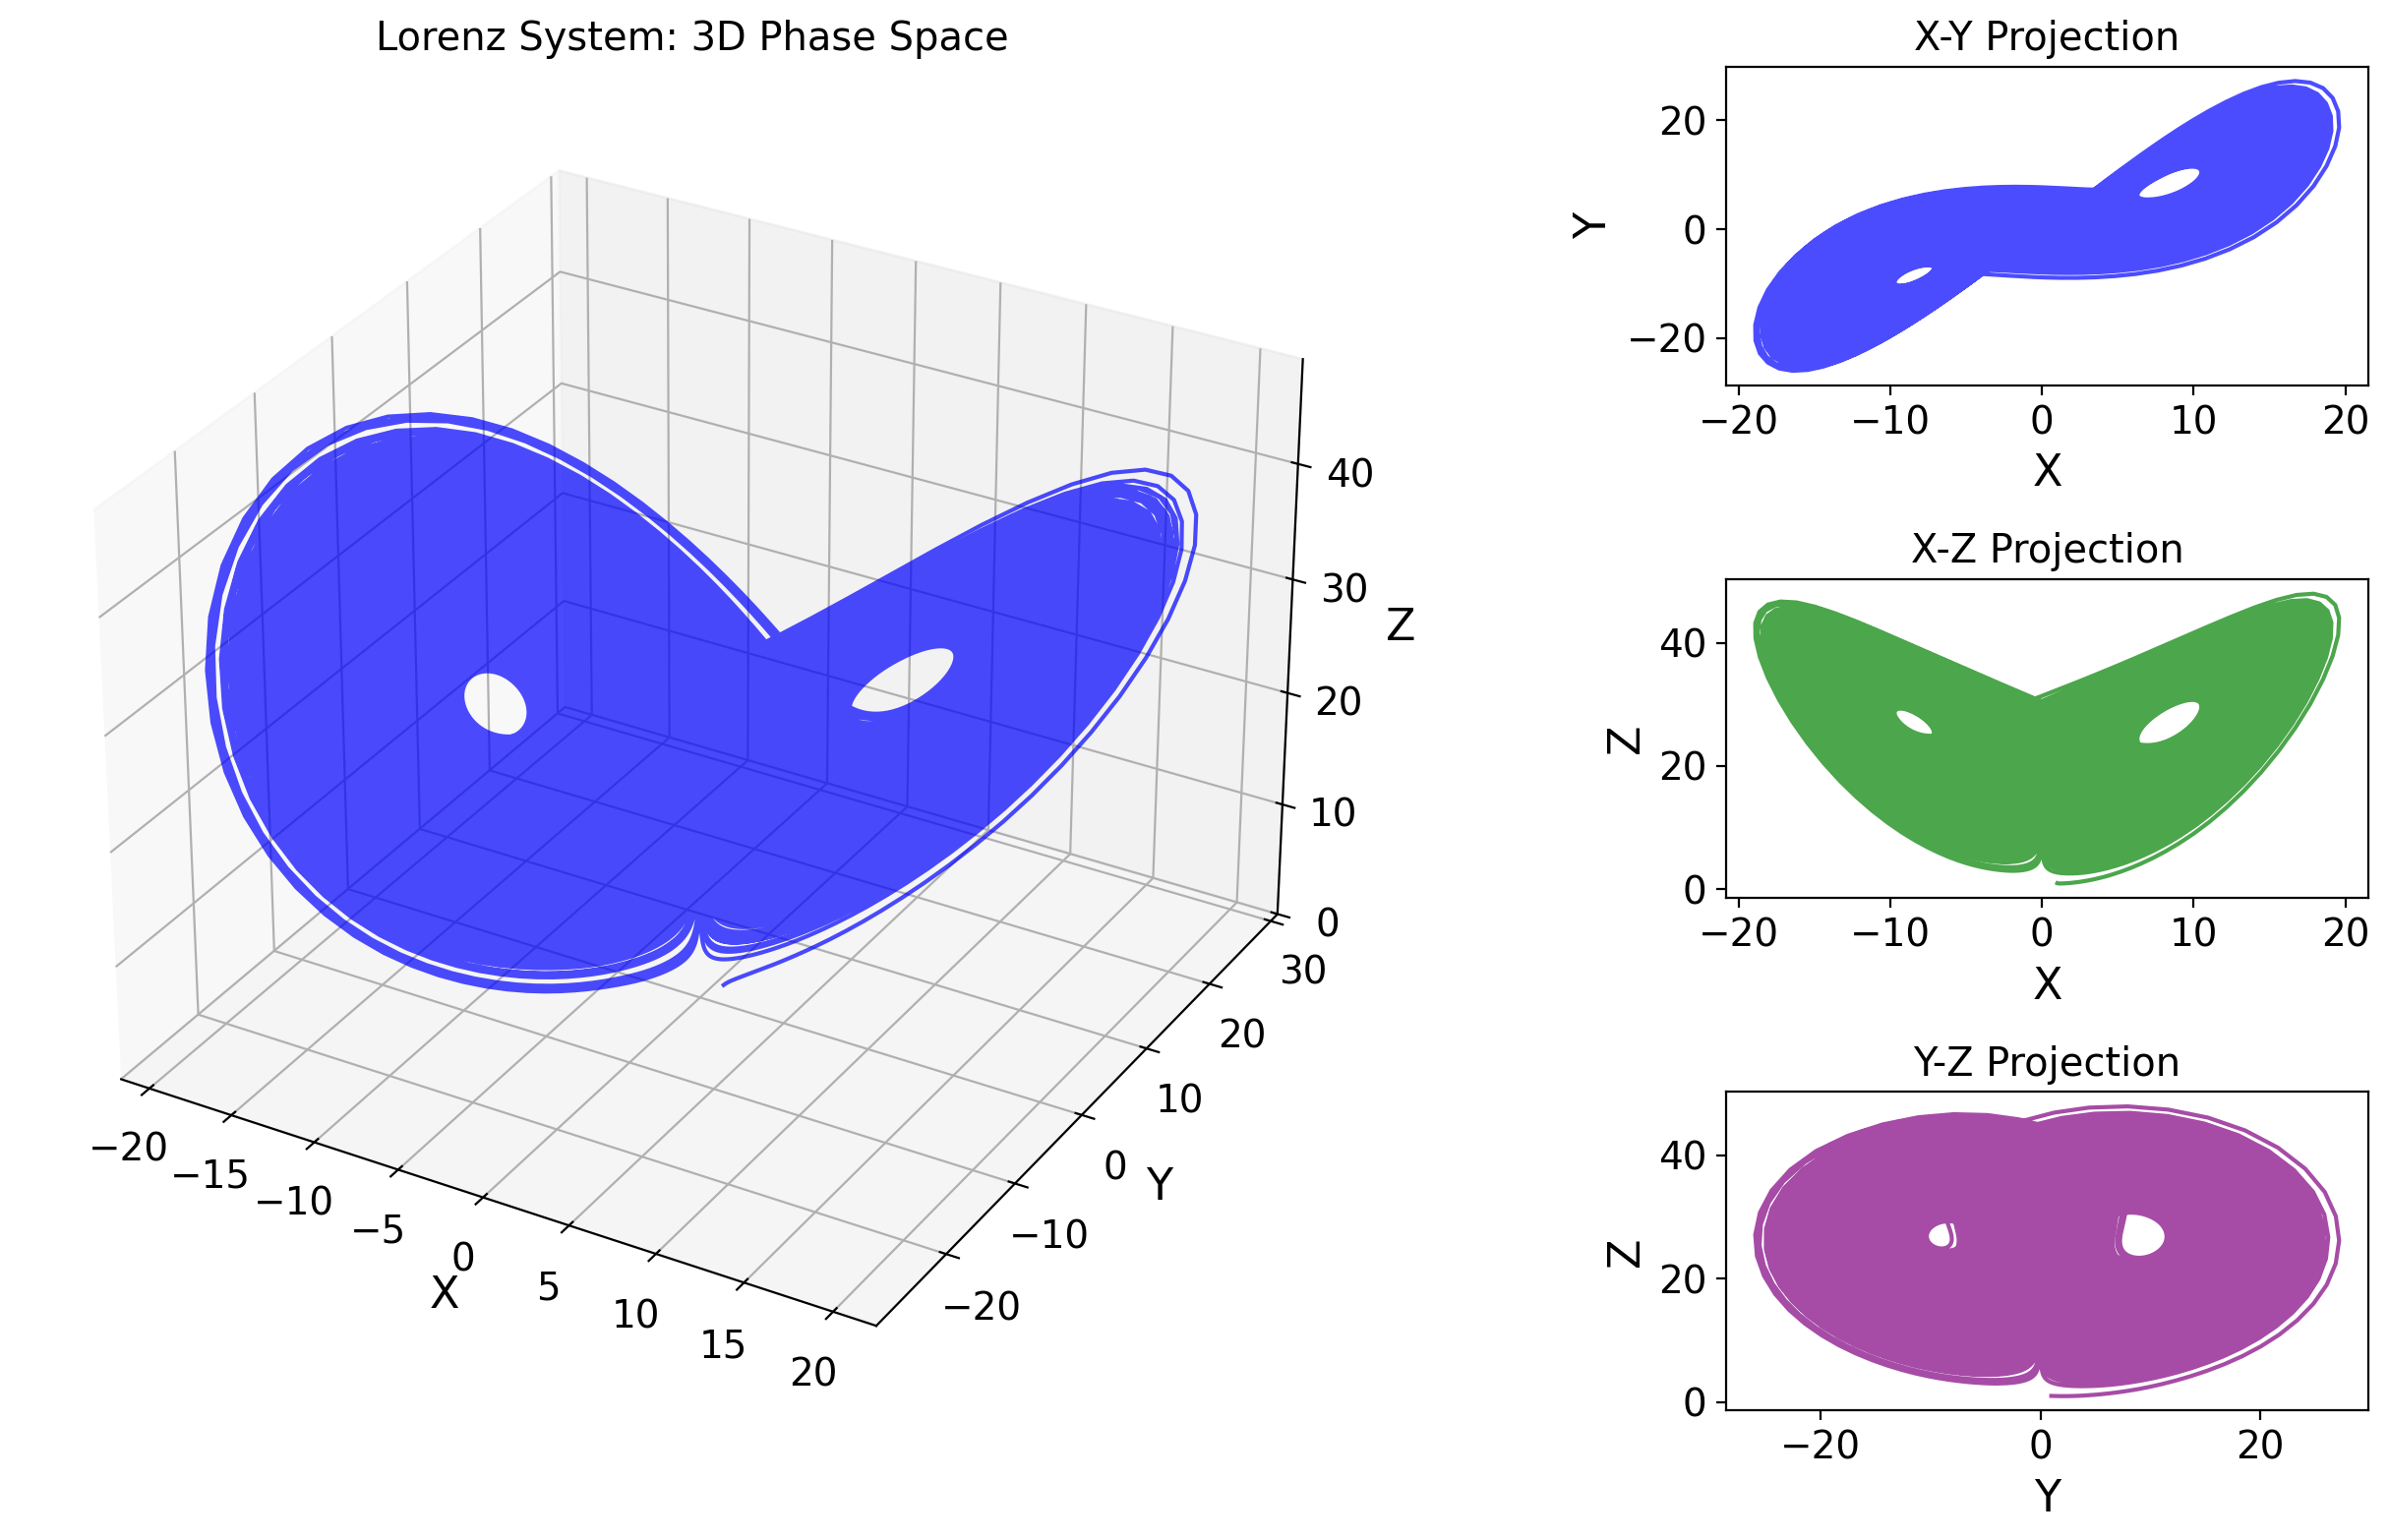

In [4]:
# Create the figure with a 3x4 grid layout
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(3, 4)  # GridSpec for custom layout

# --- 3D Phase Space Plot (Spanning 3 rows, 3 columns) ---
ax1 = fig.add_subplot(gs[:, :3], projection='3d')
ax1.plot(x, y, z, color="blue", alpha=0.7)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Lorenz System: 3D Phase Space")

# --- x-y Projection (Row 1, Col 4) ---
ax2 = fig.add_subplot(gs[0, 3])
ax2.plot(x, y, color="blue", alpha=0.7)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("X-Y Projection")

# --- x-z Projection (Row 2, Col 4) ---
ax3 = fig.add_subplot(gs[1, 3])
ax3.plot(x, z, color="green", alpha=0.7)
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("X-Z Projection")

# --- y-z Projection (Row 3, Col 4) ---
ax4 = fig.add_subplot(gs[2, 3])
ax4.plot(y, z, color="purple", alpha=0.7)
ax4.set_xlabel("Y")
ax4.set_ylabel("Z")
ax4.set_title("Y-Z Projection")

plt.tight_layout()
plt.show()

----------------------
### 1(b)

At local maxima of $z(t)$, $z'(t)=0$. So we can track $z'(t)$ and find times $t_i$ and $t_{i+1}$ such that $z'(t)$ changes sign form positive to negative, i.e. $z'(t_i)>0$ and $z'(t_{i+1})<0$. Therefore, we can approximate the maxima and the true time at maxima.
$$ t_{max}= t_i - \frac{z'(t_i)}{z'(t_{i+1}) - z'(t_i)} (t_{i+1} - t_i) $$
$$ z_{max} = z_i + \frac{z_{i+1} - z_i}{t_{i+1} - t_i} (t_{max} - t_i) $$

In [5]:
# compute z'(t) for each t
_,_,dz = Lorenz(t, [x,y,z])

# find the maxima of z
z_maximas = []
for i in range(len(t) - 1):
    if dz[i] > 0 and dz[i + 1] < 0:  # Detect zero crossing (dz ≈ 0)
        t_max = t[i] - dz[i] * (t[i + 1] - t[i]) / (dz[i + 1] - dz[i])
        z_max = z[i] + (z[i + 1] - z[i]) * (t_max - t[i]) / (t[i + 1] - t[i])
        z_maximas.append(z_max)

---------------
### 1(c)

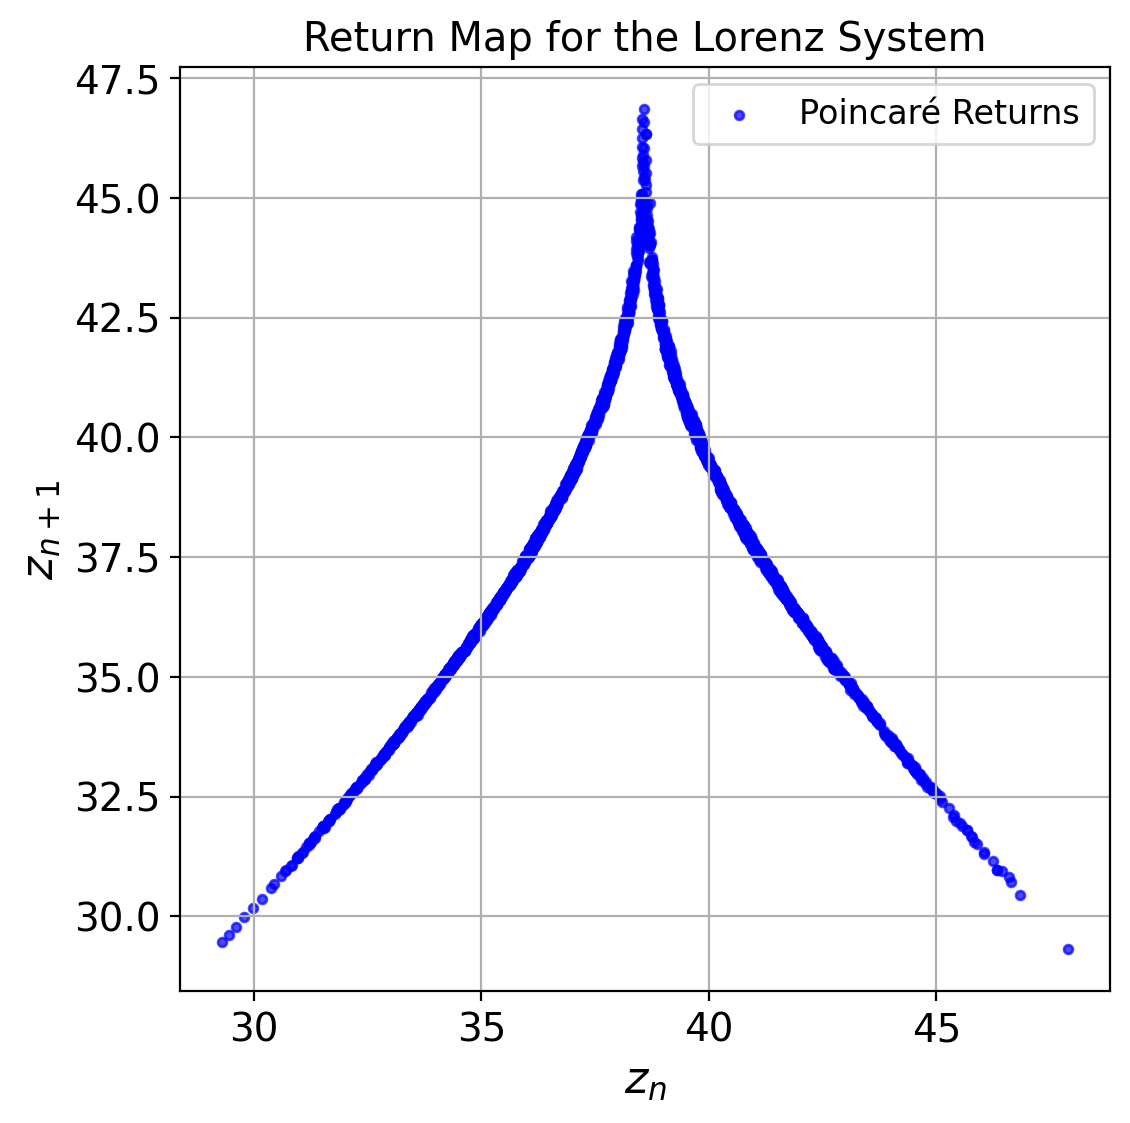

In [6]:
# generate return map data
z_n = np.array(z_maximas[:-1])
z_n1 = np.array(z_maximas[1:])

# Plot the return map
plt.figure(figsize=(6, 6))
plt.scatter(z_n, z_n1, color='blue', alpha=0.7, s=10, label="Poincaré Returns")
plt.xlabel("$z_n$")
plt.ylabel("$z_{n+1}$")
plt.title("Return Map for the Lorenz System")
plt.legend()
plt.grid(True)
plt.show()

--------------
### 1(d)

In [7]:
# the index of the largest z_n+1
ind = np.where(z_n1==max(z_n1))[0][0]
# separate the index of left and right branch
left_inds = np.where(z_n<=z_n[ind])[0]
right_inds = np.where(z_n>=z_n[ind])[0]

poly_degree = 2  # Choose a degree that captures complexity but avoids overfitting
# Fit polynomial of the left branch
poly_coeffs_left = np.polyfit(z_n[left_inds], z_n1[left_inds], poly_degree)  
poly_fit_left = np.poly1d(poly_coeffs_left)  # Convert to polynomial function
# Fit polynomial of the right branch
poly_coeffs_right = np.polyfit(z_n[right_inds], z_n1[right_inds], poly_degree)
poly_fit_right = np.poly1d(poly_coeffs_right)  # Convert to polynomial function

We can plot two fitted polynomials and the return map to see if it works.

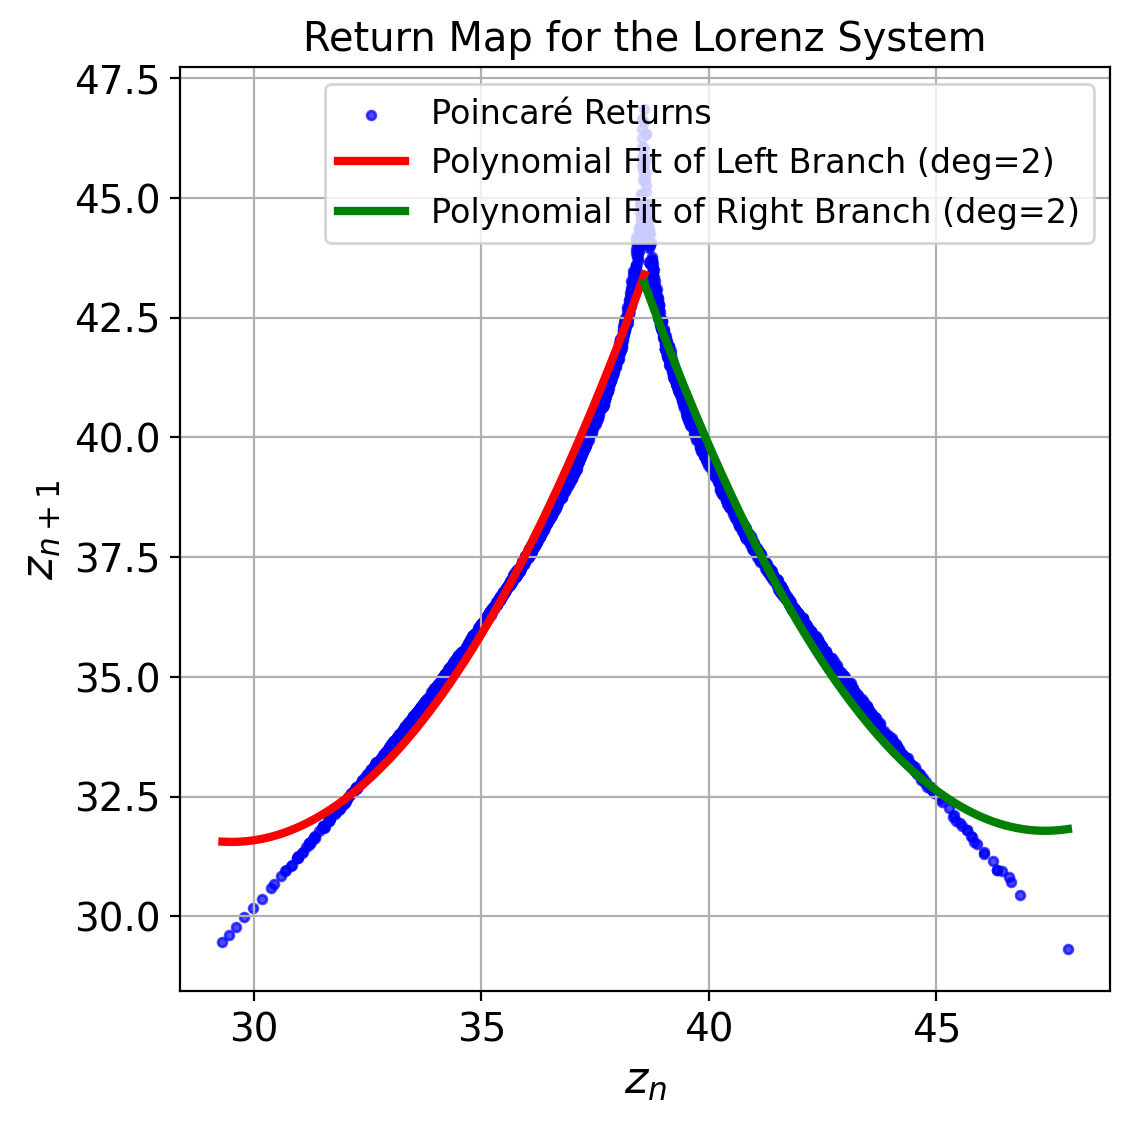

In [8]:
# Smooth range for plotting fit
y_sweep_left = np.linspace(z_n[left_inds].min(), z_n[left_inds].max(), 300)
y_sweep_right = np.linspace(z_n[right_inds].min(), z_n[right_inds].max(), 300)

plt.figure(figsize=(6, 6))
plt.scatter(z_n, z_n1, color='blue', alpha=0.7, s=10, label="Poincaré Returns")
plt.plot(y_sweep_left, poly_fit_left(y_sweep_left), color='red', linewidth=3, label=f"Polynomial Fit of Left Branch (deg={poly_degree})")
plt.plot(y_sweep_right, poly_fit_right(y_sweep_right), color='green', linewidth=3, label=f"Polynomial Fit of Right Branch (deg={poly_degree})")
plt.xlabel("$z_n$")
plt.ylabel("$z_{n+1}$")
plt.title("Return Map for the Lorenz System")
plt.legend()
plt.grid(True)
plt.show()

----------------
### 1(e)

In [9]:
# equations of left and right branches
equation_terms_left = [f"{coef:.5f} (z_n)^{poly_degree - i}" for i, coef in enumerate(poly_coeffs_left)]
equation_terms_right = [f"{coef:.5f} (z_n)^{poly_degree - i}" for i, coef in enumerate(poly_coeffs_right)]
equation_left = " + ".join(equation_terms_left).replace("+ -", "- ")
equation_right = " + ".join(equation_terms_right).replace("+ -", "- ")

# generate the piecewise function
piecewise_terms = [
    (equation_left, f"z_n ≤ {z_n[ind]:.5f}"),
    (equation_right, f"z_n > {z_n[ind]:.5f}"),
]

equation = "z_{n+1} = {\n  " + "\n  ".join([f"{expr},   if {condition}" for expr, condition in piecewise_terms]) + "\n}"

# Print the formatted piecewise function
print("\nReconstructed Piecewise Function:")
print(equation)


Reconstructed Piecewise Function:
z_{n+1} = {
  0.14392 (z_n)^2 - 8.49395 (z_n)^1 + 156.87606 (z_n)^0,   if z_n ≤ 38.58200
  0.14732 (z_n)^2 - 13.96383 (z_n)^1 + 362.66976 (z_n)^0,   if z_n > 38.58200
}


------------
### 1(f)

In [10]:
# piecewise function shown above
def f(z, z_max, f_left, f_right):
    if z<=z_max:
        return f_left(z)
    else:
        return f_right(z)

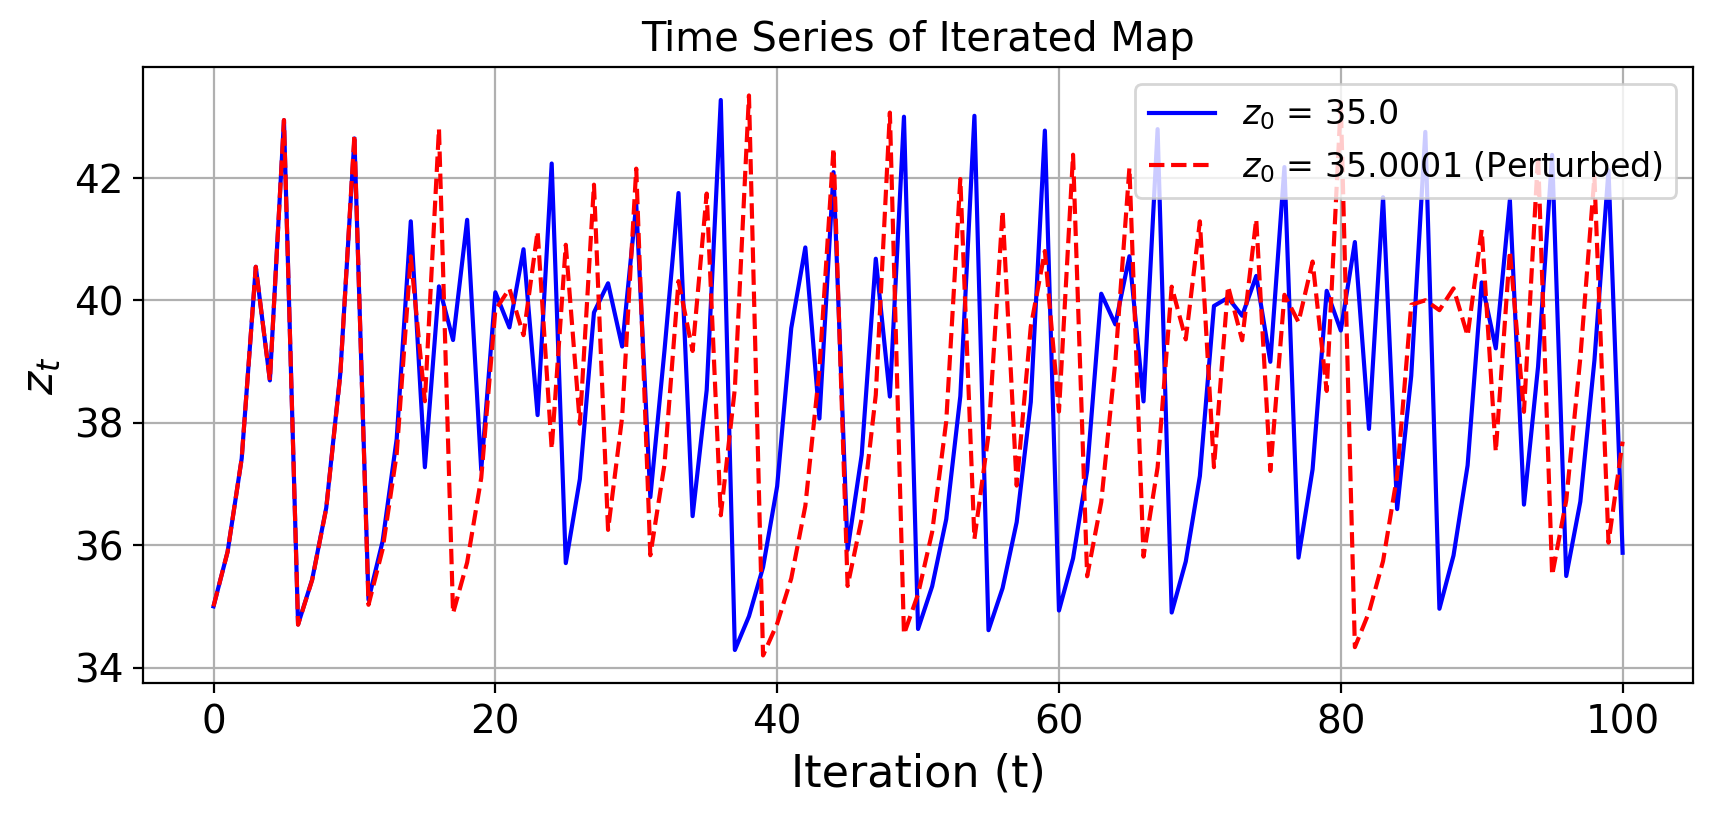

In [11]:
# Time Evolution of the Iterated Map
num_iterations = 100  # Number of time steps
z0_1 = 35.0  # Initial condition 1
z0_2 = 35.0001  # Slightly perturbed initial condition

z_vals_1 = [z0_1]
z_vals_2 = [z0_2]
for _ in range(num_iterations):
    z_vals_1.append(f(z_vals_1[-1], z_n[ind], poly_fit_left, poly_fit_right))
    z_vals_2.append(f(z_vals_2[-1], z_n[ind], poly_fit_left, poly_fit_right))

# plot the iterated map
time_steps = np.arange(num_iterations + 1)

plt.figure(figsize=(10, 4))
plt.plot(time_steps, z_vals_1, label=f"$z_0$ = {z0_1}", color="blue")
plt.plot(time_steps, z_vals_2, label=f"$z_0$ = {z0_2} (Perturbed)", color="red", linestyle="dashed")
plt.xlabel("Iteration (t)")
plt.ylabel("$z_t$")
plt.title("Time Series of Iterated Map")
plt.legend()
plt.grid(True)
plt.show()

From the figure above, iterated sequence **remains bounded but non-repeating**, this means the system is **chaotic**. The system is very sensitive to the initial condition. A small change can lead to two different trajectories as time evolves. 

To compare the sensitivity of initial condition of the system to the tent map, we need to plot a similar iterated map for tent map.

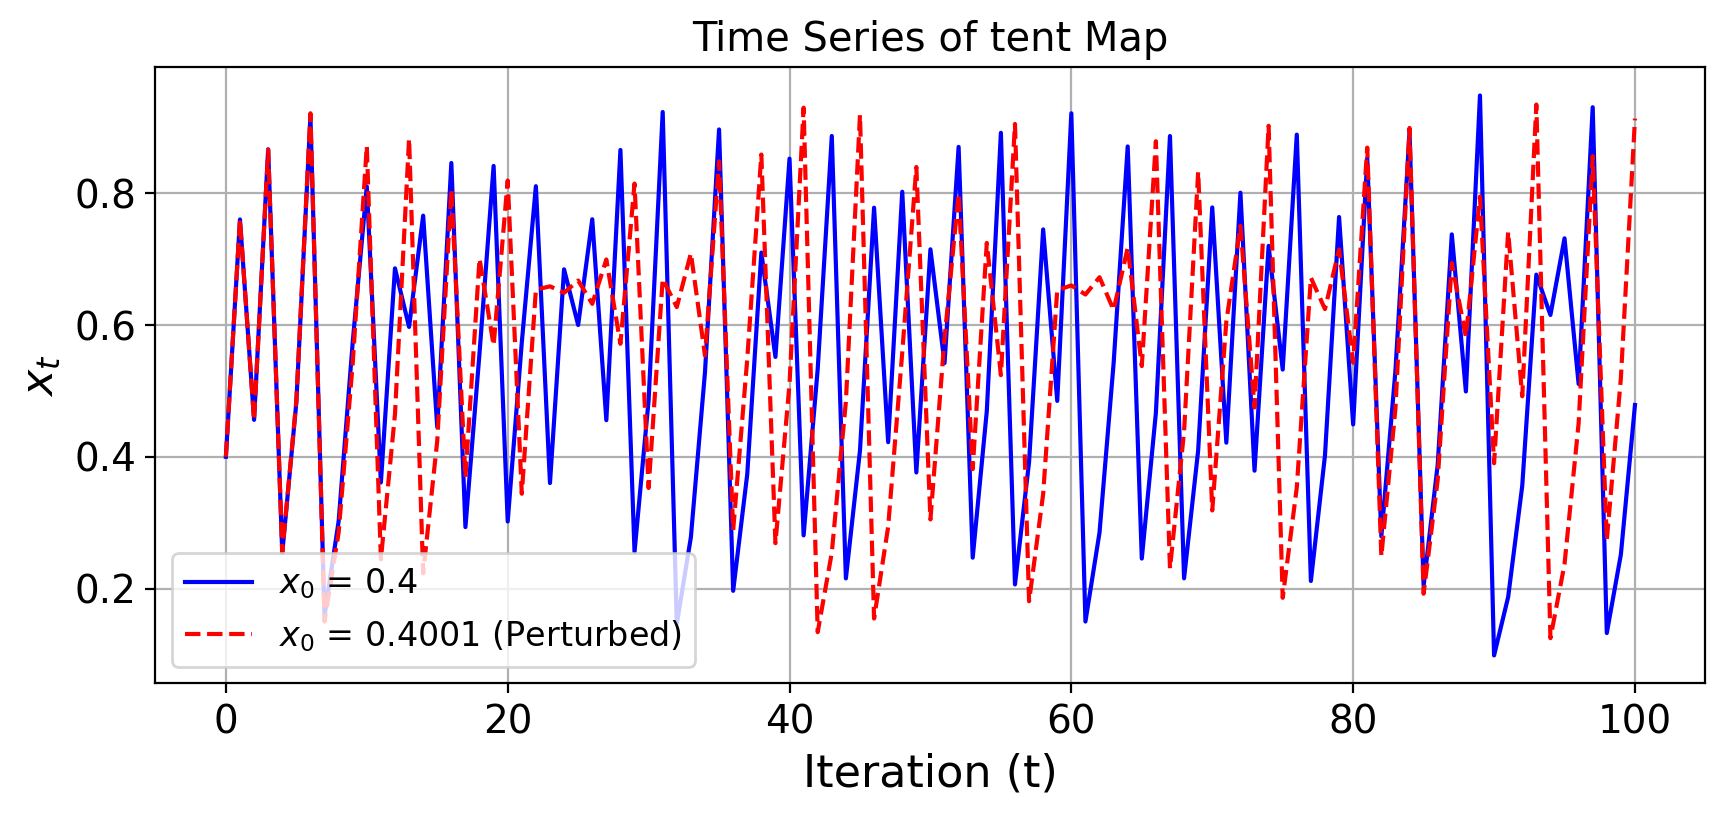

In [12]:
# function of tent map
def tent(x, mu):
    return mu*min(x,1-x)

mu = 1.9 # choice of mu
x0_1 = 0.4  # Initial condition 1
x0_2 = 0.4001  # Slightly perturbed initial condition

x_vals_1 = [x0_1]
x_vals_2 = [x0_2]
for _ in range(num_iterations):
    x_vals_1.append(tent(x_vals_1[-1], mu))
    x_vals_2.append(tent(x_vals_2[-1], mu))

plt.figure(figsize=(10, 4))
plt.plot(time_steps, x_vals_1, label=f"$x_0$ = {x0_1}", color="blue")
plt.plot(time_steps, x_vals_2, label=f"$x_0$ = {x0_2} (Perturbed)", color="red", linestyle="dashed")
plt.xlabel("Iteration (t)")
plt.ylabel("$x_t$")
plt.title("Time Series of tent Map")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
print('The index where two trajectories show the difference')
print('For Lorenz: ', np.where(abs(np.array(z_vals_1)-np.array(z_vals_2))>0.01)[0][0])
print('For tnet: ', np.where(abs(np.array(x_vals_1)-np.array(x_vals_2))>0.01)[0][0])

The index where two trajectories show the difference
For Lorenz:  8
For tnet:  8


It is clear that when $\mu=1.9$, two iterated masp share a similar sensitivity to the initial condition (two trajectories become totally different after $t \approx 8$).